# B3전원호 빅데이터 3일차 과제

In [1]:
# 데이터 구성 패키지 : Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 통계 분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import shapiro
from scipy.stats import ttest_1samp



## 실습1) 이항분포 

In [2]:
#표본 수
n=3
for i in range(n+1):
    # 이항분포 확률 질량 함수
    prob = stats.binom.pmf(k=i, n=n, p=0.4)
    print("P(X={0}))={1:3f}".format(i,prob))

P(X=0))=0.216000
P(X=1))=0.432000
P(X=2))=0.288000
P(X=3))=0.064000


## 실습2) 정규성검정

In [3]:
# camshaft 데이터 가져오기
ds_2sample_t_test=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/2sample_t_test.csv")
ds_2sample_t_test

Mat_A  Mat_B  Total  Sub
0    73.4   68.7   73.4    1
1    77.0   71.4   77.0    1
2    73.7   69.8   73.7    1
3    73.3   75.3   73.3    1
4    73.1   71.3   73.1    1
5    71.5   72.7   71.5    1
6    74.5   66.9   74.5    1
7    77.5   70.2   77.5    1
8    76.4   74.4   76.4    1
9    77.7   70.1   77.7    1
10    NaN    NaN   68.7    2
11    NaN    NaN   71.4    2
12    NaN    NaN   69.8    2
13    NaN    NaN   75.3    2
14    NaN    NaN   71.3    2
15    NaN    NaN   72.7    2
16    NaN    NaN   66.9    2
17    NaN    NaN   70.2    2
18    NaN    NaN   74.4    2
19    NaN    NaN   70.1    2

In [4]:
#결측치 제거
ds_2sample_t_test.dropna(axis=0, inplace =True)
ds_2sample_t_test

Mat_A  Mat_B  Total  Sub
0   73.4   68.7   73.4    1
1   77.0   71.4   77.0    1
2   73.7   69.8   73.7    1
3   73.3   75.3   73.3    1
4   73.1   71.3   73.1    1
5   71.5   72.7   71.5    1
6   74.5   66.9   74.5    1
7   77.5   70.2   77.5    1
8   76.4   74.4   76.4    1
9   77.7   70.1   77.7    1

In [5]:
data1=ds_2sample_t_test['Mat_A']
#정규성 검정
stats.shapiro(data1)

ShapiroResult(statistic=0.906264066696167, pvalue=0.2563020884990692)

- 정규성 검정결과(95% 신뢰수준 사용시) p-value가 0.05보다 크므로 정규성이 있다.

In [6]:
data2=ds_2sample_t_test['Mat_B']
stats.shapiro(data2)

ShapiroResult(statistic=0.9729753732681274, pvalue=0.9169775247573853)

- 정규성 검정결과(95% 신뢰수준 사용시) p-value가 0.05보다 크므로 정규성이 있다.

In [7]:
statistic, p =stats.shapiro(data1)
print(statistic,p)

0.906264066696167 0.2563020884990692


# 실습3)모평균 구간추정

In [8]:
#df를 직접 입력
df=pd.DataFrame({"sample":[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
df.head()

sample
0      18
1      18
2      20
3      21
4      20

In [9]:
#정규분포 구간 추정 함수 실행
lower,upper = stats.norm.interval(0.95,loc=np.mean(df),scale=3.8/np.sqrt(20))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: ([17.83],[21.17])


- 17.83~21.17의 면적(확률은) 95%

# 실습4) 모평균 신뢰구간 추정
               모표준편차를 모르는 경우

In [10]:
df=pd.DataFrame({'sample':[73,71,74,69,70,73,70,68,75,72
                          ,70,72,73,70,70,72,71,70,75,72]})
lower,upper=stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale=stats.sem(df))
print("신뢰구간: {0},{1}".format(lower.round(2),upper.round(2)))


신뢰구간: [70.6],[72.4]


- 양측검정 --> 70.6 ~ 72.4 면적(확률)=0.95%

# 실습5) 추론통계 (1-sample t-test)

<AxesSubplot:>

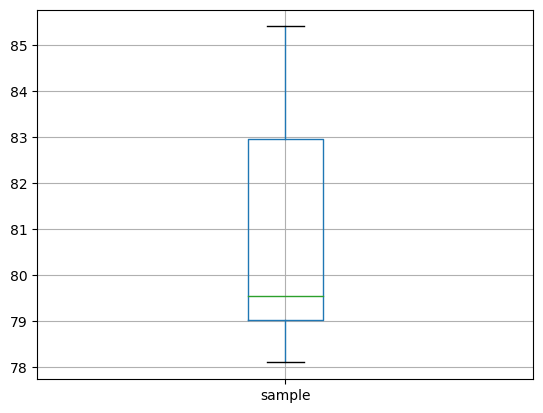

In [11]:
df=pd.DataFrame({'sample':[85.0, 79.0,79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
df.boxplot(['sample'])

In [12]:
#'statis' 정규성 검정: Shapiro-Wilk Test
statistic,p=stats.shapiro(df['sample'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8473217487335205, p-value=0.0539751797914505


- p-value 값 > 0.05 이므로 자료의 분포는 정규분포를 따른다.(귀무가설)

In [13]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df,78.0)

# 1-Sample t-test의 t값 p값 저장
t,p=t_result.statistic.round(3), \
t_result.pvalue.round(3)

# 1-Sample t-test t값 p값 출력
print("1-Sample t-test")
print("t 통계랑 : {} ".format(t))
print(" p-value : {}".format(p))

1-Sample t-test
t 통계랑 : [3.379] 
 p-value : [0.008]


### step1 
### 귀무가설 : 고객서비스센터의 고객만족도 평균은  78.0 이다
### 대립가설 : 고객서비스센터의 고객만족도 평균은 78.0이 아니다
### step2
### 유의수준 α= 0.05
### step3
### p-value 값 < 0.05 이므로 개선활동이 고객만족도  시켰다고 할 수 있다.
### step4
### 결론: 고객서비스센터의 고객만족도는 좋아졌다.

# 실습6) 추론통계(2-Sample t-test,두 집단 간 평균이 같은지 비교)

<AxesSubplot:>

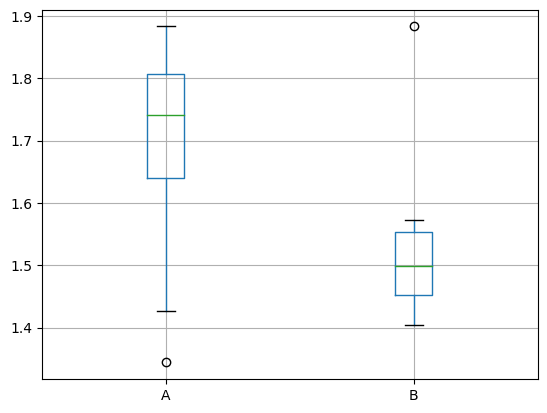

In [14]:
df=pd.DataFrame({'A':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
                'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})
#Group별 boxplot
df.boxplot(['A','B'])

In [15]:
#'A' 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['A'])
print("statistic={},p-value={}".format(statistic,p))

statistic=0.8425754904747009,p-value=0.08004532009363174


In [16]:
#'B' 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['B'])
print("statistic={},p-value={}".format(statistic,p))

statistic=0.7734811902046204,p-value=0.014793740585446358


- 하나가 비정규성을 띄어 등분산성 검정 할 필요 없고 비모수 시행

In [17]:
stats.mannwhitneyu(df['A'], df['B'])

MannwhitneyuResult(statistic=43.5, pvalue=0.24764784610289658)

- 'B'가 비정규성을 띄지만 정규성을 띈다고 가정하에 등분산성 검정 시행

In [18]:
#등분산성 검정
stats.bartlett(df['A'],df['B'])

BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

In [19]:
# 2-Sample t-test
t_result=stats.ttest_ind(df['A'],df['B'])

# 2-Sample t-test의 t값 p값 저장
t,p=t_result.statistic.round(3),t_result.pvalue.round(3)

# 2-Sample t-test t값 p값 출력
print("2-Sample t-test")
print(" t: {}".format(t))
print(" P: {}".format(p))

2-Sample t-test
 t: 1.7
 P: 0.111


### step1 
### 귀무가설 : 공급자 간에 모평균에 차이가 없다.
### 대립가설 : 공급자 간에 모평균에 차이가 있다.
### step2
### 유의수준 α= 0.05
### step3
### p-value 값 > 0.05 이므로 공급자 간 모평균에 차이가 없다.(귀무가설)
### step4
### 결론: A,B제품 두께 간 평균이 같다(그러나 B가 비정규성이기 때문에 오류 발생-->잘못된 오류)

# 실습7) Paired t-test : 짝을 이루는 집단의 평균의 차이가 있는지 검정

In [20]:
df1=pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2=pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})

# Paired t-test
t_result = stats.ttest_rel(df1,df2)

# Paired t-test의 t값 p값 저장
t,p = t_result.statistic.round(3),t_result.pvalue.round(4)

# Paired t-test의 t값 p값 출력
print("Paired t-test")
print(" t:{}".format(t))
print(" p:{}".format(p))

Paired t-test
 t:[-2.266]
 p:[0.0497]


### step1 
### 귀무가설 : 회사원들의 성적은 학원가기 전후에 대해 차이가 없다.
### 대립가설 : 회사원들의 성적은 학원가기 전후에 대해 차이가 있다.
### step2
### 유의수준 α= 0.05
### step3
### p-value 값 < 0.05 이므로 기무가설 기각(대립가설 채택), 통계량이 음수이기 때문에 before < after인 것을 알 수 있다.
### step4
### 결론: 회사원들의 성적은 학원가기 전후에 대해 차이가 있다.즉, 학원 가는 것이 효과가 있다.

# 실습8) 1 Proportion test

In [21]:
#가설수립
H0 : p=0.5
H1 : p!=0.5
p=0.4

#변수 선언
count=40
n_obs=100
value=0.5

#Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

#Proportion test 결과 출력
print("1 Proportion test")
print(' z: {0:0.3f}'.format(stat))
print(' p: {0:0.3f}'.format(pval))

1 Proportion test
 z: -2.041
 p: 0.041


### step1 
### 귀무가설 : 동전의 앞면이 나올 확률과 모집단의 확률이 같다.
### 대립가설 : 동전의 앞면이 나올 확률과 모집단의 확률이 다르다.
### step2
### 유의수준 = 0.05
### step3
### p-value 값 < 0.05 이므로 대립가설 채택 
### step4
### 결론: 동전은 비정상이다. 동전의 모양이 바뀌었을 가능성이 높다.

# 실습9) 2 Proportion test

In [22]:
#변수 선언 
count=np.array([14,5])
nobs = np.array([1200,1200])

#Proportion test 실행
stat, pval = proportions_ztest(count, nobs)

# Proportion test 결과 출력
print( "2 Proportion test")
print( ' z:{0:0.3f}'.format(stat))
print( ' p:{0:0.3f}'.format(pval))

2 Proportion test
 z:2.073
 p:0.038


### step1 
### 귀무가설 : 두 공정의 불량률은 차이가 없다.
### 대립가설 : 두 공정의 불량률은 차이가 있다.
### step2
### 유의수준 α= 0.05
### step3
### p-value 값 < 0.05 이므로 대립가설 채택 
### step4
### 결론: 두 공정의 불량률은 차이가 있다.

# 실습10) 카이제곱 검정, chi-square test

In [23]:
df=pd.DataFrame({'A':[18,1,8,7,10,9,10], 'B':[8,2,14,5,5,9,4],
                'C':[4,1,3,4,9,5,4], 'D':[4,1,2,3,2,7,3],
                'E':[3,1,3,1,1,1,1], 'F':[3,25,8,10,2,1,7]})

# chi-square test 실행
chi,pval,dof,expected= stats.chi2_contingency(df)

# chi-square test 결과 출력
print( "chi-square test ")
print( 'chisq: {0:0.3f}'.format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}'.format(dof))
print( ' expected value: \n{}'.format(expected.round(3)))

chi-square test 
chisq: 98.274
 p: 0.000
 degree pf freedom: 30
 expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


### step1 
### 귀무가설 : 각 제품에 대해 이미지에 대한 차이가 없다.
### 대립가설 : 각 제품에 대해 이미지에 대한 차이가 있다.
### step2
### 유의수준 α= 0.05
### step3
### p-value 값 < 0.05 이므로 대립가설 채택 
### step4
### 결론: 각 제품에 대해 이미지에 대한 차이가 있다. 즉, 32명의 소비자는 A~F 제품마다 브랜드 이미지가 달라 선호하는 제품이 있을 것으로 보인다.

# 실습11) ANOVA

In [24]:
sample=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/ANOVA.csv")
sample

time charge gangjong type
0   32.2      A        a    a
1   30.4      B        a    a
2   33.6      C        a    a
3   36.4      D        a    a
4   33.9      E        a    a
5   34.9      F        a    a
6   33.1      A        b    a
7   29.9      B        b    a
8   31.7      C        b    a
9   27.5      D        b    a
10  34.0      E        b    a
11  30.7      F        b    a
12  32.6      A        c    b
13  32.7      B        c    b
14  29.3      C        c    b
15  25.9      D        c    b
16  31.1      E        c    b
17  23.8      F        c    b
18  26.7      A        d    b
19  28.5      B        d    b
20  30.9      C        d    b
21  26.2      D        d    b
22  32.3      E        d    b
23  23.7      F        d    b

In [25]:
gangjong = sample.groupby('gangjong')['time'].apply(list).to_dict()
df_gangjong = pd.DataFrame(gangjong)
df_gangjong

a     b     c     d
0  32.2  33.1  32.6  26.7
1  30.4  29.9  32.7  28.5
2  33.6  31.7  29.3  30.9
3  36.4  27.5  25.9  26.2
4  33.9  34.0  31.1  32.3
5  34.9  30.7  23.8  23.7

<AxesSubplot:>

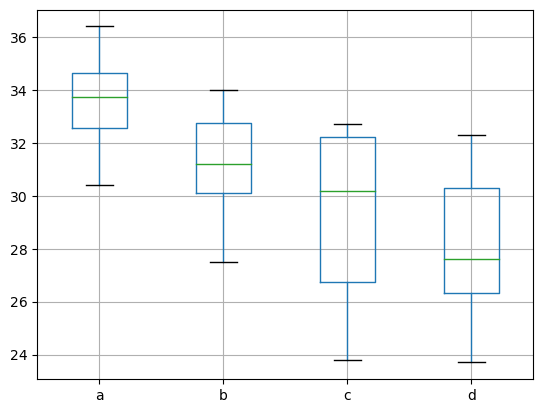

In [26]:
%matplotlib inline

df_gangjong.boxplot(['a','b','c','d'])

- 귀무가설 : 강종별 2차정련 시간에 차이가 없다.
- 대립가설 : 강종별 2차정련 시간에 차이가 있다.

In [27]:
f_result = stats.f_oneway(df_gangjong['a'],df_gangjong['b'],df_gangjong['c'],df_gangjong['d'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One - way")
print(" F 통계량 : {}".format(f))
print(" p 통계량 : {}".format(p))

One - way
 F 통계량 : 4.172
 p 통계량 : 0.019


- p-value <0.05 이므로 대립가설 채택 --> 강종별 2차정련 시간에 차이가 있다.

In [28]:
type1 = sample.groupby('type')['time'].apply(list).to_dict()
df_type = pd.DataFrame(type1)
df_type

a     b
0   32.2  32.6
1   30.4  32.7
2   33.6  29.3
3   36.4  25.9
4   33.9  31.1
5   34.9  23.8
6   33.1  26.7
7   29.9  28.5
8   31.7  30.9
9   27.5  26.2
10  34.0  32.3
11  30.7  23.7

<AxesSubplot:>

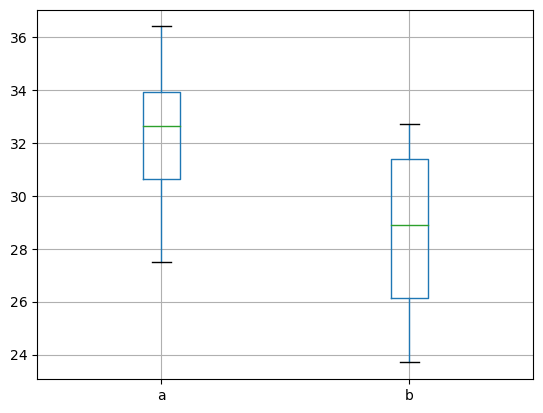

In [29]:
%matplotlib inline

df_type.boxplot(['a','b'])

- 귀무가설: type별 2차정련 시간에 차이가 없다.
- 대립가설: type별 2차정련 시간에 차이가 있다.

In [30]:
f_result = stats.f_oneway(df_type['a'],df_type['b'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One - way")
print(" F 통계량 : {}".format(f))
print(" p 통계량 : {}".format(p))

One - way
 F 통계량 : 9.654
 p 통계량 : 0.005


- p-value < 0.05 이므로 대립가설 채택 --> type별 2차정련 시간에 차이가 있다

### 결론:  강종별 type에 따라 2차정련 시간에 차이가 있으므로 청정도를 높이기 위해서는 강종과 type을 고려하여 제강공정을 실시한다.                                                                 

# 실습12) Correlation Analysis

In [31]:
df1=[37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5 ]
df2=[14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

#Correlation Analysis 실행
corr,pval = stats.pearsonr(df1,df2)

#Correlation, p-value 결과 출력
print( "Correlation Analysis")
print( ' corr: {0:0.3f}'.format(corr))
print( ' p-value: {0:0.3f}'.format(pval))

Correlation Analysis
 corr: -0.723
 p-value: 0.000


### step1 
### 귀무가설 : 초코칩의 강도와 재료 반죽온도간에는 상관관계가 없다.
                   (온도와 강직도는 상관 계수가 0이다.)
### 대립가설 : 초코칩의 강도와 재료 반죽온도간에는 상관관계가 있다.
                    (온도와 강직도는 상관 계수가 0이 아니다.)
### step2
### 유의수준 α= 0.05
### step3
### p-value 값 < 0.05 이므로 대립가설 채택  
### step4
### 결론: 초코칩의 강도와 재료 반죽온도간에는 매우 강한 상관성이 있다.
      --> 초코칩은 강도와 재료 반죽 온도와 강한 음의 상관관계를 가지고 있으므로 초코칩 요리시 두 가지를 고려하여 더욱 질 좋은 초코칩을 만들어야한다. 